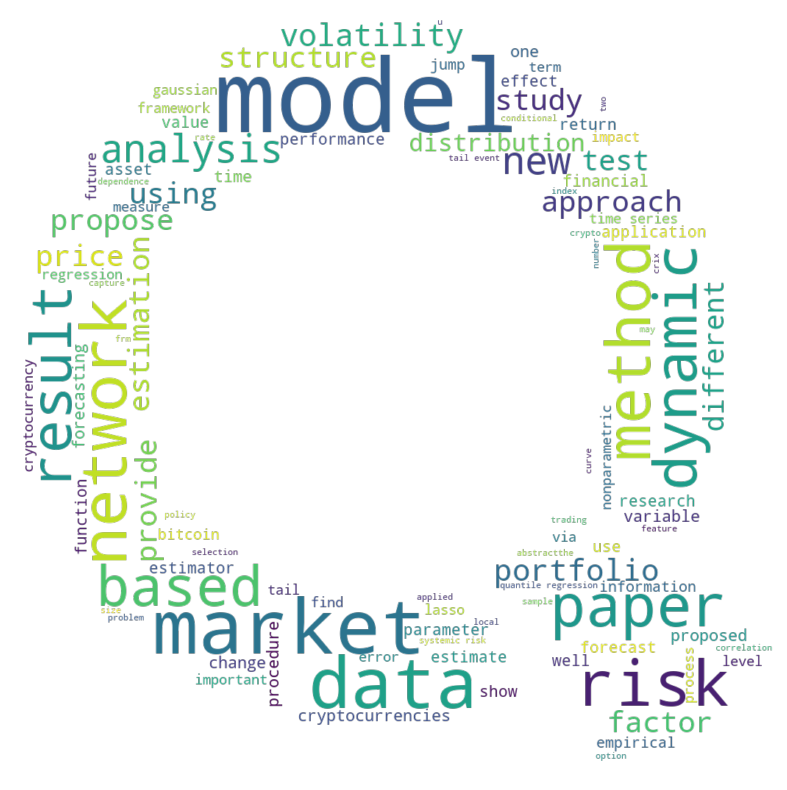

<Figure size 640x480 with 0 Axes>

In [5]:
#Abstract_LDA_wordcloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# Please change the working directory to your path!
# os.chdir("/Users/xinwenni/LDA-DTM/xmas_song")
sub_dir = os.getcwd() + '/DEDA_class2019_SYSU_Abstract_LDA_wordcloud/'
cwd_dir = sub_dir if os.path.exists(sub_dir) else os.getcwd()  # the path you save your files

raw_text = open(cwd_dir + '/Abstract_all.txt', 'r', encoding='utf-8').read() #!!!!!!!!!!!!!!!!!!!!!!!!!!
raw_text = str(raw_text)
raw_text = re.sub('\n', ' ', raw_text)

cleantextprep = str(raw_text)

# keep only letters, numbers and whitespace
expression = "[^a-zA-Z0-9 ]"
cleantextCAP = re.sub(expression, '', cleantextprep)  # apply regex
cleantext = cleantextCAP.lower()  # lower case

with open(cwd_dir + "/Output_total.txt", "w")as text_file:
    text_file.write(str(cleantext))

# Read the whole text.
with open(path.join(cwd_dir, 'Output_total.txt'), 'r', encoding='utf-8', errors='ignore') as outout_file:
    text = outout_file.readlines()

# Mask
# xmas_tree_pic = np.array(Image.open(path.join(cwd_dir, "xmas_tree2.png")))
ql_pic = np.array(Image.open(cwd_dir + '/QuantletsLogo_Ring.jpg'))

# Optional additional stopwords
stopword = set(STOPWORDS)
stopword = stopword.union({'abstract', 'keywords', 'sep'})

# Construct Word Cloud
# no backgroundcolor and mode = 'RGBA' create transparency
wc = WordCloud(max_words=100, stopwords=stopword, mask=ql_pic, mode='RGBA', background_color=None)

# Pass Text
wc.generate(text[0])

# store to file
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(cwd_dir + "wordcloud_abstract.png", dpi=300, transparent=True)

In [4]:
#Abstract_LDA_Crawler
import requests  # take the website source code back to you
import urllib  # some useful functions to deal with website URLs
from bs4 import BeautifulSoup as soup  # a package to parse website source code
import numpy as np  # all the numerical calculation related methods
import re  # regular expression package
import itertools  # a package to do iteration works
import pickle  # a package to save your file temporarily
import pandas as pd  # process structured data
import os

sub_dir = os.getcwd() + '/DEDA_class2019_SYSU_Abstract_LDA_Crawler/'
cwd_dir = sub_dir if os.path.exists(sub_dir) else os.getcwd()  # the path you save your files
base_link = 'http://www.wiwi.hu-berlin.de/de/forschung/irtg/results/discussion-papers'  # This link can represent the domain of a series of websites
abs_link = 'https://www.wiwi.hu-berlin.de/de/forschung/irtg/results/'
# abs_folder = cwd_dir + 'Abstracts/'
# os.makedirs(abs_folder, exist_ok=True)

request_result = requests.get(base_link, headers={'Connection': 'close'})  # get source code
parsed = soup(request_result.content)  # parse source code
tr_items = parsed.find_all('tr')
info_list = []
for item in tr_items:
    link_list = item.find_all('td')
    try:
        paper_title = re.sub(pattern=r'\s+', repl=' ', string=link_list[1].text.strip())
        author = link_list[2].text
        date_of_issue = link_list[3].text
        abstract_link = link_list[5].find('a')['href']
        info_list.append([paper_title, author, date_of_issue, abstract_link])
    except Exception as e:
        print(e)
        print(link_list[5])
        continue

abstract_all = list()

for paper in info_list:
    print(paper[0])
    try:
        paper_abstract_page = requests.get(paper[3], headers={'Connection': 'close'})

        if paper_abstract_page.status_code == 200:
            # if paper[3][-3:] == 'txt':
            abstract_parsed = soup(paper_abstract_page.content)
            main_part = abstract_parsed.find_all('div', attrs={'id': r'content-core'})[0].text.strip()
            # if paper[3][-3:] == 'pdf':
            #     abstract_parsed = soup(paper_abstract_page.content)
            #     main_part = abstract_parsed.find_all('body')[0].text.strip()

            main_part = re.sub(r'.+?[Aa]bstract', 'Abstract', main_part)
            main_part = re.sub(r'JEL [Cc]lassification:.*', '', main_part)
            main_part = re.sub(r'[A-Za-z][0-9][0-9]?', '', main_part)
            main_part = re.sub('[\r\n]+', ' ', main_part)

            abstract_all.append(main_part + "\nSEP\n")

        else:
            raise ConnectionError(f"Can not access the website. Error Code: {paper_abstract_page.status_code}")
        # with open(abs_folder + f"{re.sub('[^a-zA-Z0-9 ]', '', paper[0])}.txt", 'w', encoding='utf-8') as abs_f:
        #     abs_f.write(main_part)

    except Exception as e:
        print(e)
        print(paper[3])
        continue

with open(cwd_dir + '/Abstract_all.txt', 'w', encoding='utf-8') as abs_all_f:
    abs_all_f.writelines(abstract_all)

'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" style="width: 40px; height: 18px;"><span style="--darkreader-inline-bgcolor: #262b35;"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></span></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" style="width: 40px; height: 18px;"><span style="--darkreader-inline-bgcolor: #262b35;"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></span></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" height="18" style="--darkreader-inline-bgcolor: #262b35;" width="40"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" height="18" style="--darkreader-inline-bgcolor: #262b3

In [8]:
import random
import os
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from os import path
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#declare the number of topics want to be generate and notated by K
K = 7 #number of topics
text_pre = open('Abstract_all.txt', encoding = "utf8").read()
doc_l = str.split(text_pre, sep = 'SEP')
doc_complete = doc_l
doc_out = []
for l in doc_l:
    cleantextprep = str(l)
    # Regex cleaning
    expression = "[^a-zA-Z ]" # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, ' ', cleantextprep) # apply regex
    cleantextCAP = re.sub('\s+', ' ', cleantextCAP) # apply regex
    cleantext = cleantextCAP.lower() # lower case 
    bound = ''.join(cleantext)
    doc_out.append(bound)
doc_complete = doc_out
stop = set(stopwords.words('english'))
stop = stop.union({'result','keywords','study','using','paper','abstract','f','x','e','result','topic','proposed','one'})
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]    
# Importing Gensim
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=7, id2word = dictionary, passes=50, random_state = 3154)
#print(ldamodel.print_topics(num_topics=3, num_words=5))
topicWordProbMat=ldamodel.print_topics(K)
columns = (['Topics '+str(x) for x in range(1,7+1)])
df = pd.DataFrame(columns=columns)
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
# 20 need to modify to match the length of vocabulary 
zz = np.zeros(shape=(100,K))
last_number=0
DC={}
data = pd.DataFrame({columns[0]:""}, index=[0])
for x in range(100):
  for i in range(1,len(columns)):
    data[columns[i]] = ""
  df = df.append(data, ignore_index=True)
for line in topicWordProbMat: 
    tp, w = line
    probs=w.split("+")
    y=0
    for pr in probs:  
        a=pr.split("*")
        df.iloc[y,tp] = a[1]
        a[1] = a[1].strip()
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1
print (df)
print (zz)
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize=(80,25))
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='center',
                 verticalalignment='center'
                 )
#plt.imshow(zz, cmap='hot', interpolation='nearest')
plt.imshow(zz, cmap='rainbow', interpolation='nearest')
#plt.show()
plt.yticks([])
# plt.title("heatmap xmas song")
plt.savefig("heatmap_abstract.png", transparent = True, dpi=400)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/yangqinqin/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


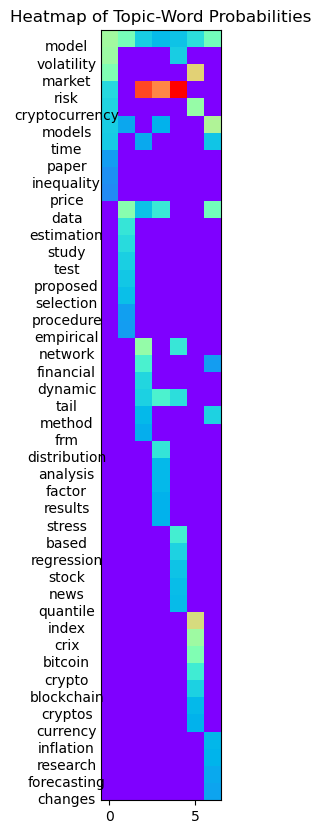

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 24 17:01:07 2024

@author: haerdle
"""
# pip install scikit-learn


import re
import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Load the text file
file_path = "Abstract_all.txt"
with open(file_path, 'r', encoding='utf-8') as f:
    documents = f.readlines()

# Function to remove specific keywords
def remove_keywords(text):
    keywords = ['Abstract', 'Keywords', 'SEP']
    for kw in keywords:
        text = re.sub(r'\b' + kw + r'\b', '', text)
    return text

# Preprocess text, removing stopwords and non-alphabetic words
def preprocess_text(text):
    text = remove_keywords(text)
    return [word for word in gensim.utils.simple_preprocess(text) if word not in ENGLISH_STOP_WORDS and word.isalpha()]

# Preprocess all documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Number of topics
num_topics = 7

# Train LDA model using gensim
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=3154)

# Print topics
topicWordProbMat = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

# Create the DataFrame for the heatmap
columns = ['Topic ' + str(x) for x in range(1, num_topics + 1)]
df = pd.DataFrame(columns=columns)
DC = {}  # Dictionary to map words to row indices
zz = np.zeros((100, num_topics))
last_number = 0

# Populate the DataFrame and the probability matrix
for topic_id, words_probs in topicWordProbMat:
    for word, prob in words_probs:
        word = word.strip()
        if word in DC:
            zz[DC[word], topic_id] = prob
        else:
            zz[last_number, topic_id] = prob
            DC[word] = last_number
            last_number += 1

# Resize the matrix to match the actual number of words
zz = np.resize(zz, (len(DC.keys()), zz.shape[1]))

# Plotting the heatmap
plt.figure(figsize=(20, 10))
plt.imshow(zz, cmap='rainbow', interpolation='nearest')

# Annotate the heatmap with words
for val, key in enumerate(DC.keys()):
    plt.text(-2.5, val + 0.5, key, horizontalalignment='center', verticalalignment='center')

# Set title and remove y-ticks (since we'll annotate manually)
plt.title("Heatmap of Topic-Word Probabilities")
plt.yticks([])

# Save the heatmap to a file
plt.savefig("heatmap_abstract.png", transparent=True, dpi=400)

# Show the plot
plt.show()